In [ ]:
import pandas as pd
from google.colab import files
import io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import sklearn
import imblearn
import seaborn as sns
import tensorflow as tf

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
for i in range(2):
  data = files.upload()

Saving kdd_train.csv to kdd_train.csv


Saving kdd_test.csv to kdd_test.csv


In [ ]:
train_data = pd.read_csv('kdd_train.csv')
test_data = pd.read_csv('kdd_test.csv')

In [ ]:
train_data.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
train_data.shape

(125973, 42)

In [ ]:
test_data.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,5,tcp,smtp,SF,2429,475,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,180,57,0.11,0.02,0.01,0.04,0.0,0.0,0.87,0.0,normal
1,0,udp,domain_u,SF,45,134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,192,269,0.0,0.0,0.0,0.0,0.99,0.01,0.01,194,155,0.80,0.02,0.01,0.00,0.0,0.0,0.00,0.0,normal
2,0,udp,domain_u,SF,45,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,121,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,0.01,0.00,0.0,0.0,0.00,0.0,normal
3,1979,udp,other,SF,145,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,2,0.01,0.84,1.00,0.00,0.0,0.0,0.00,0.0,normal
4,14462,tcp,other,RSTR,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.0,1.0,1.00,0.00,0.00,255,2,0.01,0.68,1.00,0.00,0.0,0.0,1.00,1.0,portsweep


In [ ]:
test_data.shape

(22544, 42)

In [ ]:
train_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.0,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
print(train_data['num_outbound_cmds'].value_counts())

0    125973
Name: num_outbound_cmds, dtype: int64


In [ ]:
print(train_data['num_outbound_cmds'].unique())

[0]


In [ ]:
train_data.nunique()

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [ ]:
train_data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
train_data.drop(['num_outbound_cmds'], axis=1, inplace=True)
test_data.drop(['num_outbound_cmds'], axis=1, inplace=True)

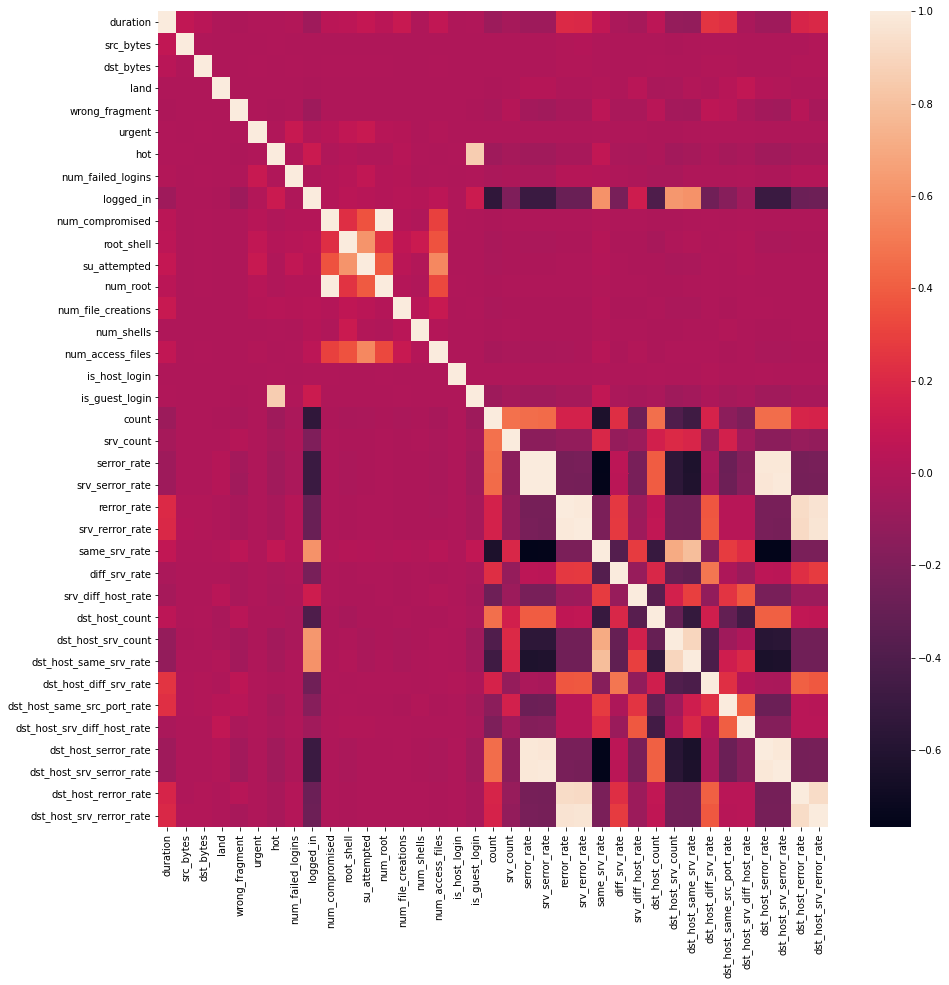

In [ ]:
correlation = train_data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation)
plt.show()

In [ ]:
train_data['labels'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: labels, dtype: int64

In [ ]:
scaler = sklearn.preprocessing.StandardScaler()
cols = train_data.select_dtypes(include=['float64', 'int64']).columns
scaler_train = scaler.fit_transform(train_data.select_dtypes(include=['float64','int64']))
scaler_test = scaler.fit_transform(train_data.select_dtypes(include=['float64','int64']))

sc_train_data = pd.DataFrame(scaler_train, columns=cols)
sc_test_data = pd.DataFrame(scaler_test, columns=cols)

In [ ]:
encoder = sklearn.preprocessing.LabelEncoder()

cat_train = train_data.select_dtypes(include=['object']).copy()
cat_test = test_data.select_dtypes(include=['object']).copy()

cat_train_data = cat_train.apply(encoder.fit_transform)
cat_test_data = cat_test.apply(encoder.fit_transform)

train = cat_train_data.drop(['labels'], axis=1)
cat_Ytrain = cat_train_data[['labels']].copy()

In [ ]:
train_x = pd.concat([sc_train_data, train], axis=1)
train_y = train_data['labels']
train_x.shape

(125973, 40)

In [ ]:
test_df = pd.concat([sc_test_data, cat_test_data], axis=1)

test_df.shape

(125973, 41)

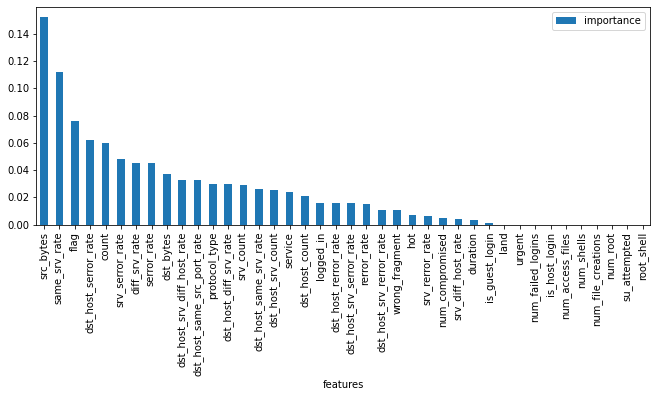

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(train_x, train_y)

imp_features_score = np.round(rfc.feature_importances_, 3)
imp_features = pd.DataFrame({'features':train_x.columns, 'importance':imp_features_score})
imp_features = imp_features.sort_values('importance', ascending=False).set_index('features')

plt.rcParams['figure.figsize'] = (11,4)
imp_features.plot.bar()

In [ ]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=17)
rfe = rfe.fit(train_x, train_y)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_x.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['src_bytes',
 'dst_bytes',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'protocol_type',
 'service',
 'flag']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(train_x, train_y, train_size=0.70, random_state=2)

In [ ]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train); 

#LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

#Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)

#Decision Tree Model
DTC_Classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)        

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
from sklearn import metrics

models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Naive Baye Classifier Model Evaluation ==============================


Model Accuracy:
 0.8762658622605777

Classification report:
                  precision    recall  f1-score   support

           back       0.98      0.97      0.98       658
buffer_overflow       0.47      0.83      0.60        18
      ftp_write       0.00      0.00      0.00         3
   guess_passwd       0.30      0.92      0.45        38
           imap       0.07      0.90      0.14        10
        ipsweep       0.54      0.85      0.67      2476
           land       0.41      1.00      0.58        14
     loadmodule       0.00      0.00      0.00         5
       multihop       0.00      0.00      0.00         3
        neptune       0.99      0.83      0.90     28864
           nmap       0.34      0.12      0.17      1034
         normal       0.98      0.93      0.95     47211
           perl       0.00      0.00      0.00         1
            phf       1.00      1.00

In [ ]:
anomaly = ['back','buffer_overflow','ftp_write','guess_passwd','imap','ipsweep','land','loadmodule','multihop','neptune','nmap','perl','phf','pod','portsweep',' rootkit','satan','smurf','spy','teardrop','warezclient','warezmaster']

def perf_measure(y_actual, y_pred):
  TP = 0
  FP = 0
  TN = 0
  FN = 0

  for i in range(len(y_pred)):
    if y_actual.iat[i] in anomaly and y_pred[i] in anomaly:
      TP += 1
    if y_pred[i] in anomaly and y_actual.iat[i] != y_pred[i]:
      FP += 1
    if y_actual.iat[i]==y_pred[i]=='normal':
      TN += 1
    if y_pred[i]=='normal' and y_actual.iat[i] != y_pred[i]:
      FN += 1
  
  return (TP, FP, TN, FN)

 


In [ ]:
 for i, v in models:
    print("For model:", i)
    TP, FP, TN, FN = perf_measure(y_test, v.predict(x_test))
    print ("TP:", TP, "\tFP:", FP, "\t\tTN:", TN, "\tFN:", FN)
    
    # Testing for first row
    print ("Expected: ", y_test.iloc[0], "Predicted: ", v.predict(x_test).reshape(1, -1)[0][2] )
    print()
    

For model: Naive Baye Classifier
TP: 17207 	FP: 4333 		TN: 18590 	FN: 449
Expected:  normal Predicted:  normal

For model: Decision Tree Classifier
TP: 17618 	FP: 61 		TN: 20091 	FN: 41
Expected:  normal Predicted:  normal

For model: KNeighborsClassifier
TP: 17561 	FP: 102 		TN: 20076 	FN: 98
Expected:  normal Predicted:  normal

For model: LogisticRegression
TP: 16986 	FP: 536 		TN: 19711 	FN: 674
Expected:  normal Predicted:  normal



In [ ]:
def find_FP(y_actual, y_pred):
    FP = []

    for i in range(len(y_pred)): 
        if y_pred[i] in anomaly and y_actual.iat[i]!=y_pred[i]:
           FP.append(i)   
    return (pd.Series(FP))
    
def find_FN(y_actual, y_pred):
    FN = []

    for i in range(len(y_pred)): 
        if y_pred[i]=='normal' and y_actual.iat[i]!=y_pred[i]:
           FN.append(i)
    return (pd.Series(FN))

In [ ]:
FP_NB= find_FP(y_test, models[0][1].predict(x_test))
print("Size of number of FP:", FP_NB.size) 
FN_NB= find_FN(y_test, models[0][1].predict(x_test))
print("Size of number of FN:", FN_NB.size) 







# Testing 
FP_NB.head(4)

Size of number of FP: 4333
Size of number of FN: 449


0     4
1    15
2    35
3    41
dtype: int64

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

####**=>Neural Network Model**



In [ ]:
def fun():
    model = Sequential()
    model.add(Dense(120, activation='relu', kernel_initializer='random_uniform'))
    model.add(Dense(60, activation='relu', kernel_initializer='random_uniform'))
    model.add(Dense(30, activation='relu', kernel_initializer='random_uniform'))
    model.add(Dense(23, activation='softmax'))
    
    model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    
    return model

In [ ]:
intrusion_model = KerasClassifier(build_fn=fun,epochs=10,batch_size=64)

In [ ]:
intrusion_model.fit(X_train, Y_train)

Epoch 1/10
1378/1378 [==============================] - 26s 2ms/step - loss: 0.5451 - accuracy: 0.8785
Epoch 2/10
1378/1378 [==============================] - 3s 2ms/step - loss: 0.0524 - accuracy: 0.9851
Epoch 3/10
1378/1378 [==============================] - 3s 2ms/step - loss: 0.0379 - accuracy: 0.9876
Epoch 4/10
1378/1378 [==============================] - 3s 2ms/step - loss: 0.0333 - accuracy: 0.9892
Epoch 5/10
1378/1378 [==============================] - 3s 2ms/step - loss: 0.0318 - accuracy: 0.9900
Epoch 6/10
1378/1378 [==============================] - 3s 2ms/step - loss: 0.0287 - accuracy: 0.9908
Epoch 7/10
1378/1378 [==============================] - 3s 2ms/step - loss: 0.0265 - accuracy: 0.9920
Epoch 8/10
1378/1378 [==============================] - 3s 2ms/step - loss: 0.0254 - accuracy: 0.9919
Epoch 9/10
1378/1378 [==============================] - 3s 2ms/step - loss: 0.0228 - accuracy: 0.9928
Epoch 10/10
1378/1378 [==============================] - 3s 2ms/step - loss: 0.02

In [ ]:
prediction = intrusion_model.predict(x_test)

In [ ]:
print(prediction)

['normal' 'normal' 'normal' ... 'neptune' 'smurf' 'neptune']


In [ ]:
accuracy = intrusion_model.score(x_test, y_test)

591/591 [==============================] - 1s 1ms/step - loss: 0.0301 - accuracy: 0.9918
